### [Multiclass & Multioutput Problems](https://scikit-learn.org/stable/modules/multiclass.html)
- This Scikit module describes **meta-estimators** - which extend the functions of **base estimators** so they may support multi-learning problems. This happens by transforming multilearning problems into sets of simpler ones - then fitting one estimator per problem.
- **Problem Types** (#targets, target cardinality, target type):
    - **Multiclass** classification: 1, >2, "multiclass"
    - **Multilabel** classification: >1, 0|1, "multilabel-indicator"
    - **Multiclass, Multioutput** classification: >1, >2, "multiclass-multioutput"
    - **Multioutput** regression: >1, continuous, "continuous-multioutput"
    
![problem tree](px/multi_org_chart.png)

- Many Scikit estimators already have built-in multilearning support. See [User Guide chapter](https://scikit-learn.org/stable/modules/multiclass.html) for complete list.

### Multiclass Classification, aka [Label Binarization](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html#sklearn.preprocessing.LabelBinarizer)
- Defined as classification with >2 classes (eg, "orange","apple","pear"; each sample can be labeled with only 1 class. ("apple".)
- All Scikit classifiers *already have built-in multiclass support*. No need to use this module except for experimental purposes.

In [1]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer as LB
from scipy import sparse

y_dense = LB().fit_transform(np.array(['apple', 'pear', 'apple', 'orange']))
y_sparse = sparse.csr_matrix(y_dense)

print(y_dense)
print(y_sparse)

[[1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]]
  (0, 0)	1
  (1, 2)	1
  (2, 0)	1
  (3, 1)	1


### [One-vs-Rest Classification](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)
- One classifier is fitted per class against all other classes.
- Advantage: intepretability (each class is represented by only one classifier).

In [7]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier as OVRC
from sklearn.svm import LinearSVC
X, y = datasets.load_iris(return_X_y=True)
OVRC(LinearSVC(random_state=0)).fit(X, y).predict(X)

/home/bjpcjp/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/bjpcjp/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Multilabel Classification
- Also supported by the [OvR classifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier).
- Feed an indicator matrix to the classifier: cell[i,j] indicates the presence of label $j$ in sample $i$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification as makeMLC
from sklearn.multiclass import OneVsRestClassifier as OVRC
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

In [4]:
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)

In [5]:
def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0]); max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1]); max_y = np.max(X[:, 1])

    classif = OVRC(SVC(kernel='linear'))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], 
                s=40, c='gray', edgecolors=(0, 0, 0))
    plt.scatter(X[zero_class, 0], 
                X[zero_class, 1], 
                s=160, edgecolors='b',
                facecolors='none', linewidths=2, label='Class 1')
    
    plt.scatter(X[one_class, 0], 
                X[one_class, 1], 
                s=80, edgecolors='orange',
                facecolors='none', linewidths=2, label='Class 2')

    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 2:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")


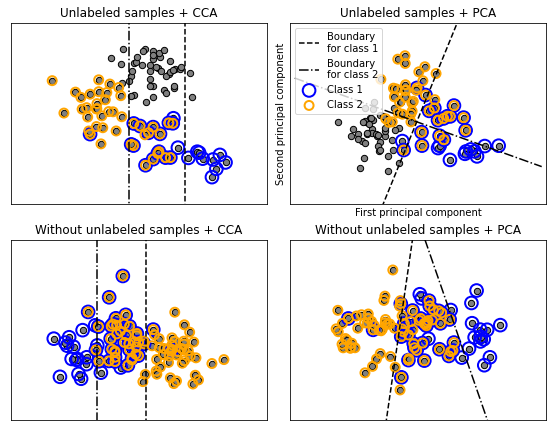

In [6]:
plt.figure(figsize=(8, 6))

X, Y = makeMLC(n_classes=2, n_labels=1,
                                      allow_unlabeled=True,
                                      random_state=1)

plot_subfigure(X, Y, 1, "Unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "Unlabeled samples + PCA", "pca")

X, Y = makeMLC(n_classes=2, n_labels=1,
                                      allow_unlabeled=False,
                                      random_state=1)

plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")

plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()



### [One vs One Classification](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html#sklearn.multiclass.OneVsOneClassifier)
- Builds one classifier per *pair of classes*.
- The class receiving the most votes is selected for prediction.
- Slower than OvR due to needing to fit `n_classes*(n_classes-1)/2` classifiers.
- Still may be desired for some kernel algorithms that don't scale as well, because each classifier involves only a subset of the training dataset. (OvR uses the complete dataset `n_classes` times.)

In [12]:
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier as OVOC
from sklearn.svm import LinearSVC

X, y = datasets.load_iris(return_X_y=True)
# had to set max_iter=5000 to solve convergence warning
OVOC(LinearSVC(random_state=0, max_iter=5000)).fit(X, y).predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### [Output Code Classification](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OutputCodeClassifier.html#sklearn.multiclass.OutputCodeClassifier)
- Each class is represented in a Euclidean space - each dimension can be only 0 or 1.
- A matrix (the "code book") tracks the location/code of each class.
- Each class should be represented by a unique code - a good code book should optimize classification accuracy.
- One binary classifier is used per bit in the code book for fitting.
- The classifer predicts the class closest to new points in the class space.

In [15]:
from sklearn import datasets
from sklearn.multiclass import OutputCodeClassifier as OCC
from sklearn.svm import LinearSVC

X, y = datasets.load_iris(return_X_y=True)
clf = OCC(LinearSVC(random_state=0, max_iter=5000), code_size=2, random_state=0)
clf.fit(X, y).predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### [Multilabel Classification](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html#sklearn.multioutput.MultiOutputClassifier)
- Labels each sample with `m` labels from `n_classes` possible classes.
- Can be described as predicting sample properties, which are not mutually exclusive.
- Each label is treated independently - multilabel classifiers can treat the classes simultaneously.
- Targets are represented by a dense or sparse binary matrix of `(#samples,#classes)`. 

In [16]:
# document classes, aka ['religion','politics','finance','education']
y = np.array([[1, 0, 0, 1], [0, 0, 1, 1], [0, 0, 0, 0]])
y_sparse = sparse.csr_matrix(y)

### [Multioutput Classification](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html#sklearn.multioutput.MultiOutputClassifier)
- Fits one classifer per target - allows multiple target classifications.

In [17]:
from sklearn.datasets import make_classification as makeCls
from sklearn.multioutput import MultiOutputClassifier as MOC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.utils import shuffle
import numpy as np

X, y1 = makeCls(n_samples=10, 
                n_features=100, 
                n_informative=30, 
                n_classes=3, 
                random_state=1)

y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)
Y  = np.vstack((y1, y2, y3)).T

n_samples, n_features = X.shape # 10,100
n_outputs             = Y.shape[1] # 3
n_classes             = 3
forest                = RFC(random_state=1)
multi_target_forest   = MOC(forest, n_jobs=-1)
multi_target_forest.fit(X, Y).predict(X)


array([[2, 2, 0],
       [1, 2, 1],
       [2, 1, 0],
       [0, 0, 2],
       [0, 2, 1],
       [0, 0, 2],
       [1, 1, 0],
       [1, 1, 1],
       [0, 0, 2],
       [2, 0, 0]])

### [Classifier Chains](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.ClassifierChain.html#sklearn.multioutput.ClassifierChain)
- Combines binary classifiers into a single multilabel model.
- Enables using correlations among targets.
- Assigns a position (0..N-1) to each of N binary classifiers in a chain.
- Each classifier is fit on the training dataset, plus the true labels of the classes whose models were lower in the chain.
- Clearly, chain order is important. The 1st model has no information about the other labels, while the last model has all available info. 
- Typically many randomly ordered chains are averaged together to avoid having to guess at an optimal order. 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets        import fetch_openml
from sklearn.multioutput     import ClassifierChain as CC
from sklearn.model_selection import train_test_split as TTS
from sklearn.multiclass      import OneVsRestClassifier as OVRC
from sklearn.metrics         import jaccard_score as jacc
from sklearn.linear_model    import LogisticRegression as LR

In [19]:
# Load a multi-label dataset from https://www.openml.org/d/40597
X, Y = fetch_openml('yeast', version=4, return_X_y=True)
Y = Y == 'TRUE'
X_train, X_test, Y_train, Y_test = TTS(X, Y, test_size=.2, random_state=0)

# Fit an independent logistic regression for each class using ONRC wrapper.
base_lr           = LR()
ovr               = OVRC(base_lr); ovr.fit(X_train, Y_train)
Y_pred_ovr        = ovr.predict(X_test)
ovr_jaccard_score = jacc(Y_test, Y_pred_ovr, average='samples')

In [20]:
# Fit an ensemble of logistic regression classifier chains and take the
# take the average prediction of all the chains.

chains = [CC(base_lr, order='random', random_state=i) for i in range(10)]

for chain in chains:
    chain.fit(X_train, Y_train)

Y_pred_chains = np.array([chain.predict(X_test) for chain in chains])

chain_jaccard_scores = [jacc(Y_test, Y_pred_chain >= .5, average='samples')
                        for Y_pred_chain in Y_pred_chains]

Y_pred_ensemble = Y_pred_chains.mean(axis=0)

ensemble_jaccard_score = jacc(Y_test, Y_pred_ensemble >= .5, average='samples')

model_scores = [ovr_jaccard_score] + chain_jaccard_scores
model_scores.append(ensemble_jaccard_score)

model_names = ('Independent',
               'Chain 1', 'Chain 2', 'Chain 3', 'Chain 4', 'Chain 5',
               'Chain 6', 'Chain 7', 'Chain 8', 'Chain 9', 'Chain 10', 'Ensemble')

x_pos = np.arange(len(model_names))

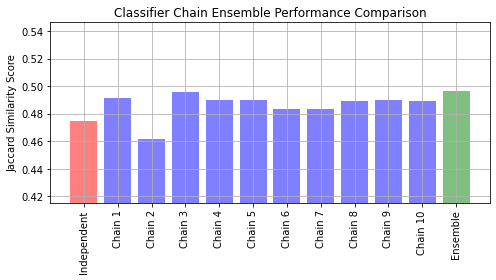

In [21]:
# Plot the Jaccard similarity scores for the independent model, each of the
# chains, and the ensemble (note that the vertical axis on this plot does
# not begin at 0).

fig, ax = plt.subplots(figsize=(7, 4))
ax.grid(True)
ax.set_title('Classifier Chain Ensemble Performance Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation='vertical')
ax.set_ylabel('Jaccard Similarity Score')
ax.set_ylim([min(model_scores) * .9, max(model_scores) * 1.1])
colors = ['r'] + ['b'] * len(chain_jaccard_scores) + ['g']
ax.bar(x_pos, model_scores, alpha=0.5, color=colors)
plt.tight_layout()
plt.show()

### Multiclass-Multioutput (aka "Multitask") Classification
- Labels each sample with one or more non-binary properties.
- A single estimator therefore handles multiple joint classification tasks.
- Example:
    - properties: "type of fruit" ("apple","pear","orange"), "color" ("green","red","yellow","orange")

### [Multioutput Regression](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html#sklearn.multioutput.MultiOutputRegressor)
- Predicts multiple numerical properties per sample.
- Valid $y$ is a dense matrix of shape(#samples,#classes) in floating point format.

In [22]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor as MOR
from sklearn.ensemble import GradientBoostingRegressor as GBR

X, y = make_regression(n_samples=10, n_targets=3, random_state=1)
MOR(GBR(random_state=0)).fit(X, y).predict(X)

array([[-154.75474165, -147.03498585,  -50.03812219],
       [   7.12165031,    5.12914884,  -81.46081961],
       [-187.8948621 , -100.44373091,   13.88978285],
       [-141.62745778,   95.02891072, -191.48204257],
       [  97.03260883,  165.34867495,  139.52003279],
       [ 123.92529176,   21.25719016,   -7.84253   ],
       [-122.25193977,  -85.16443186, -107.12274212],
       [ -30.170388  ,  -94.80956739,   12.16979946],
       [ 140.72667194,  176.50941682,  -17.50447799],
       [ 149.37967282,  -81.15699552,   -5.72850319]])

### [Regressor Chaining]()
- Anagolous to Classifier Chains. Combines regressors into a single multitarget model to exploit target correlations.

In [24]:
from sklearn.multioutput import RegressorChain as RC
from sklearn.linear_model import LogisticRegression as LR

logreg = LR(solver='lbfgs',multi_class='multinomial')

X, Y = [[1, 0], [0, 1], [1, 1]], [[0, 2], [1, 1], [2, 0]]

chain = RC(base_estimator=logreg, order=[0, 1]).fit(X, Y)
chain.predict(X)

array([[0., 2.],
       [1., 1.],
       [2., 0.]])